<a href="https://colab.research.google.com/github/anujchauhan001/Placement-prediction/blob/main/project_Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Importing Data Set**

In [ ]:
df = pd.read_csv("/content/placement-dataset.csv")

In [ ]:
df.head()


,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [ ]:
df.tail()

,city,cgpa,iq,placement
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1
99,New York,6.2,113.0,1


# **Uderstanding Data Set using info() function**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       92 non-null     float64
 2   iq         96 non-null     float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


# **Checking for NULL values**

In [ ]:
df.isnull().sum()

city         0
cgpa         8
iq           4
placement    0
dtype: int64

# **Filling NAN values with Mean**



In [ ]:
mean_value_cgpa = df['cgpa'].median()
mean_value_iq = df['iq'].median()

In [ ]:
print(mean_value_cgpa)
print(mean_value_iq)

6.0
122.0


In [ ]:
df['cgpa'].fillna(value = mean_value_cgpa, inplace = True)
df['iq'].fillna(value = mean_value_iq, inplace = True)

In [ ]:
df.isnull().sum()

city         0
cgpa         0
iq           0
placement    0
dtype: int64

# **Ploting Scatter Plot**

Text(0, 0.5, 'iq')

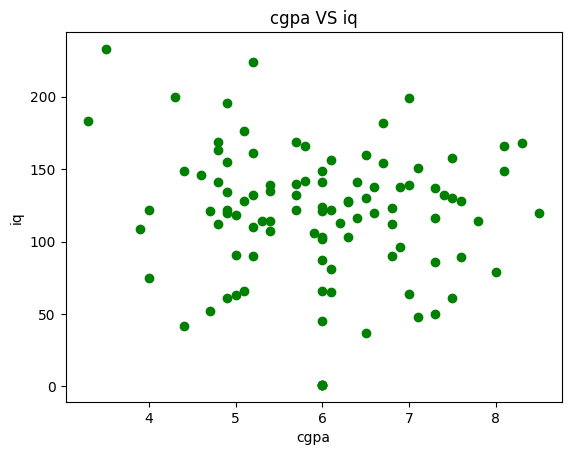

In [ ]:
plt.scatter(df['cgpa'],df['iq'],color = 'green')
plt.title("cgpa VS iq")
plt.xlabel("cgpa")
plt.ylabel("iq")

# **Extracting Input and Output Column**

In [ ]:
x = df.iloc[:,1:3]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

# **Spliting Training and Testing Data**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# **Scale the Value between 0 to 1**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
print(x_train)
x_test = scaler.transform(x_test)
print("x--------x_test-----------x")
print(x_test)

[[ 0.02332689  0.10724142]
 [-1.72618963  0.06376517]
 [ 0.37323019 -0.06666359]
 [-1.11385885  0.04202704]
 [-0.50152807 -0.26230672]
 [-0.5890039  -0.11013984]
 [-0.50152807 -0.11013984]
 [-1.72618963 -0.95792675]
 [ 0.02332689 -2.56654807]
 [-0.50152807  0.43331331]
 [-1.11385885 -1.45790365]
 [-0.85143137 -1.21878426]
 [-1.37628633  0.65069457]
 [-0.23910059  0.45505144]
 [-0.23910059  0.28114643]
 [-2.16356876  2.47669715]
 [ 1.33546428  0.23767018]
 [-1.81366546 -0.21883047]
 [ 0.19827854 -0.13187796]
 [ 0.11080271 -1.17530801]
 [-0.9389072   0.02028892]
 [ 0.72313349 -0.15361609]
 [ 0.02332689 -2.56654807]
 [-1.02638302 -0.15361609]
 [-0.76395555  1.23762397]
 [ 0.02332689 -0.69706924]
 [-0.67647972  0.91155208]
 [ 0.02332689 -0.37099735]
 [ 0.02332689  0.47678956]
 [ 1.24798845  0.28114643]
 [ 0.37323019  0.47678956]
 [ 0.02332689 -2.56654807]
 [ 0.02332689 -1.61007053]
 [ 1.86031923  0.65069457]
 [-0.67647972  2.28105402]
 [ 0.63565767  1.36805273]
 [-1.46376215  1.75933899]
 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# **Model Training**

In [ ]:
clf.fit(x_train,y_train)

LogisticRegression()

# **Perform Prediction**

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
y_test

14    0
40    0
71    1
6     0
52    0
51    0
86    0
48    1
32    1
64    1
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

# **Provide Logistic Regression splitting Image**

<Axes: >

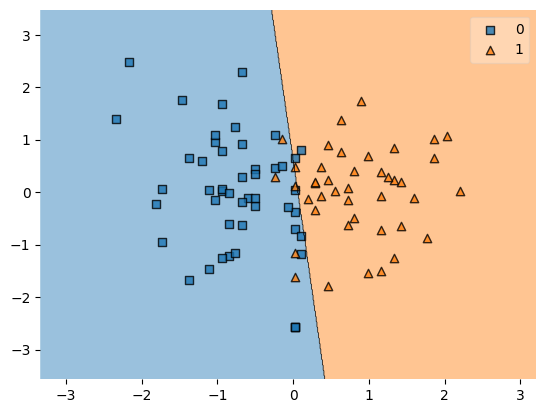

In [ ]:
plot_decision_regions(x_train,y_train.values,clf = clf)

# **Save our file in a form of Model**

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open("Model.PK1","wb"))